# Ejercicio 1

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from funciones_auxiliares_hito_2 import analizar_variables_indpendientes

plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('seaborn')

In [4]:
df = pd.read_csv('default_credit.csv').drop(columns='index')

Analizando todas las variables numericas 



,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


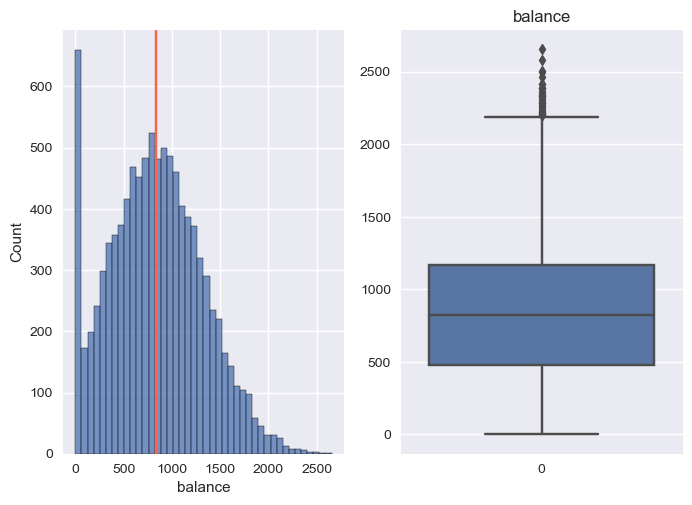

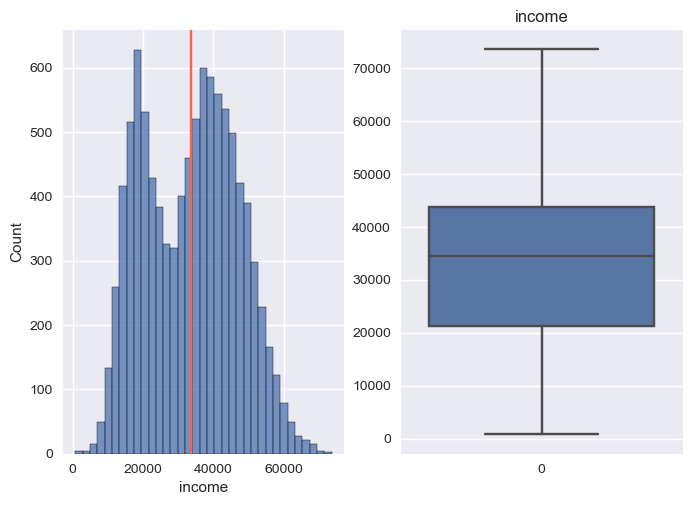

Analizando todas las variables categoricas 

default
No     9667
Yes     333
Name: default, dtype: int64


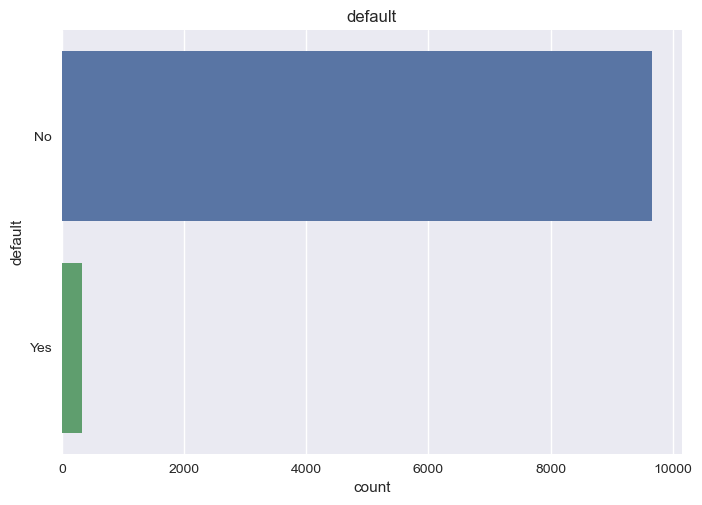

student
No     7056
Yes    2944
Name: student, dtype: int64


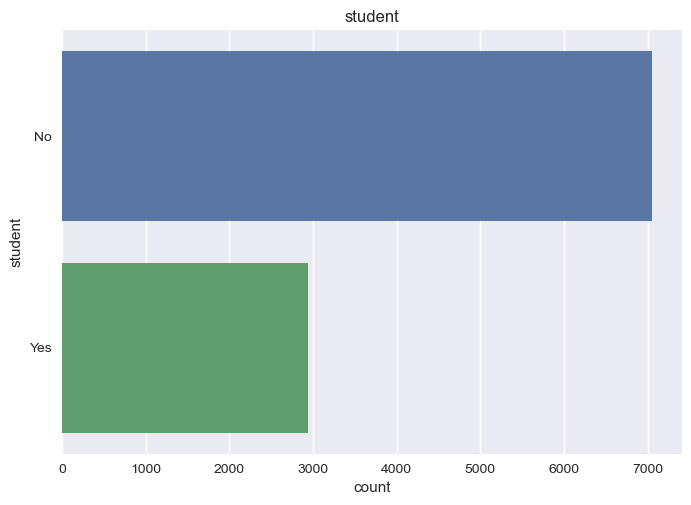

,cantidad_na,porcentaje_na
default,0,0.0
student,0,0.0
balance,0,0.0
income,0,0.0


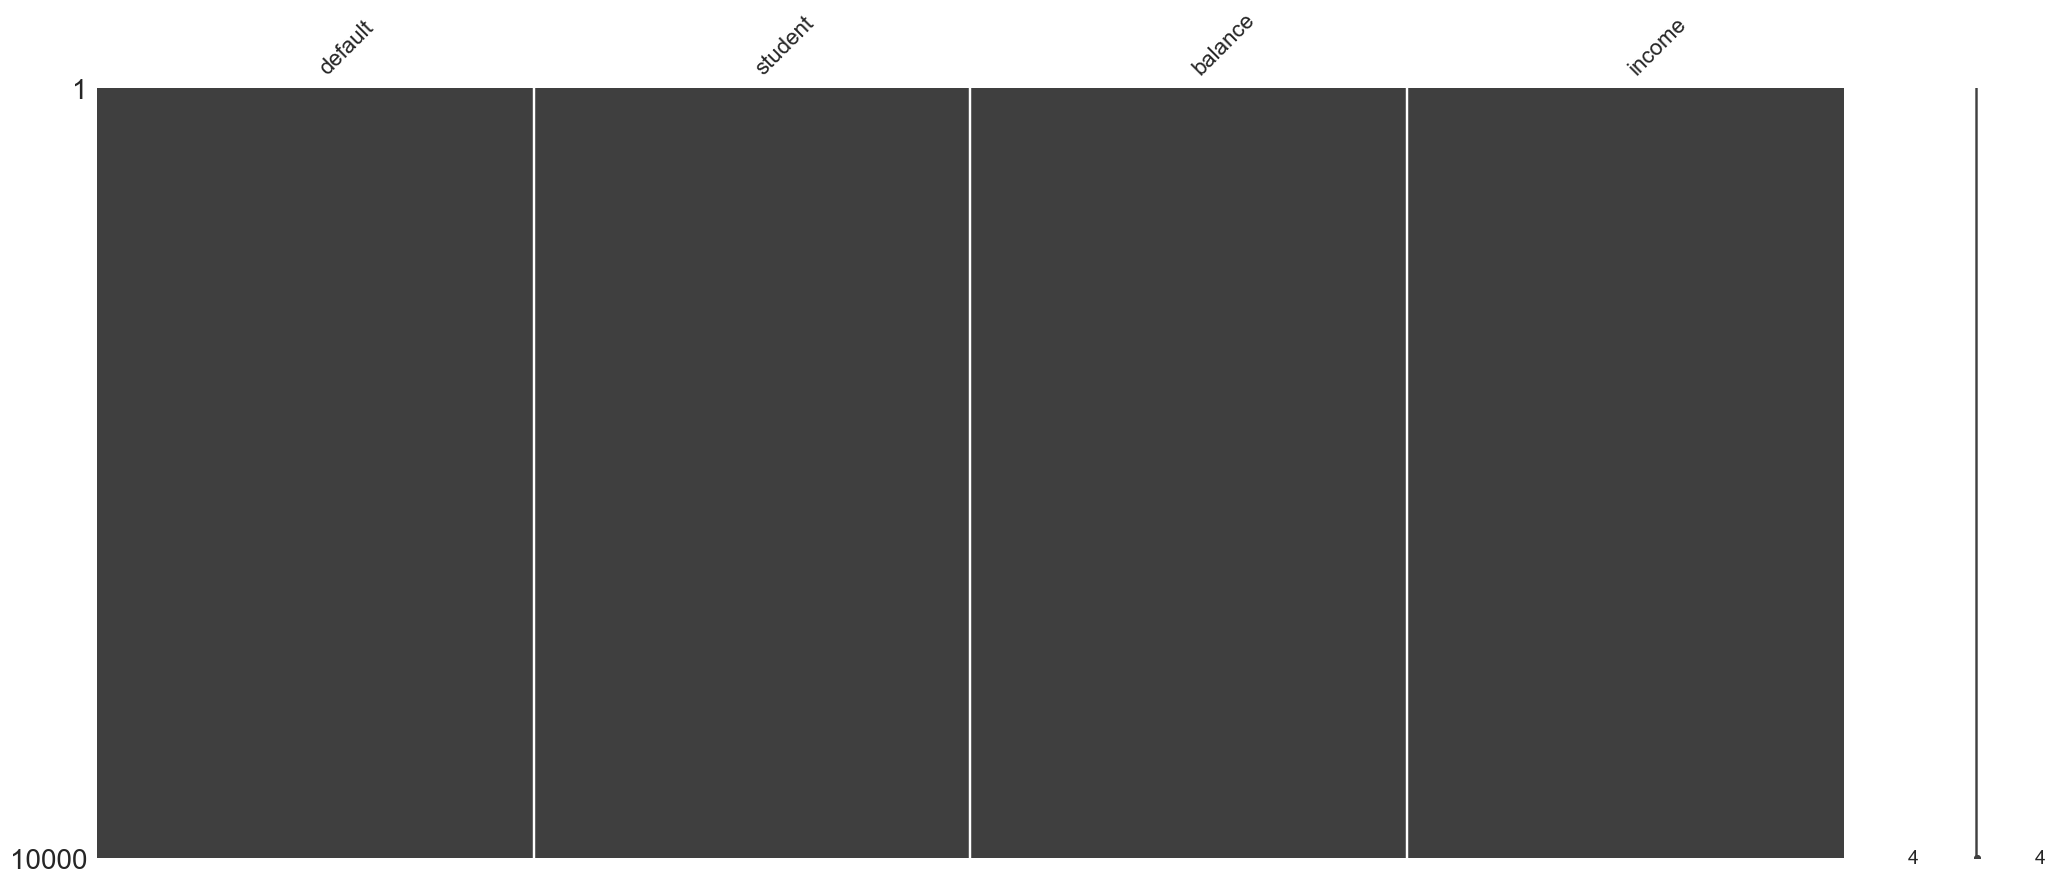

In [12]:
analizar_variables_indpendientes(df)

Del analisis anterior se observo lo siguiente:

- Las variables balance e income presentan distribuciones relativamente normales en sus datos.
- El vector objetivo ```default``` presenta un sesgo hacia los clientes no morosos.
- La variable ```student``` presenta una mayor cantidad de clientes que no son estudiantes.

- No existen valores faltantes en la base de datos.

# Ejercicio 2

In [ ]:
# Debido a que las variables default presentan valores en formato string, deben ser transformadas
# a numeros. Esto se realizara con LabelEncoder

In [14]:
df['default'] = LabelEncoder().fit_transform(df['default'])
df['student'] = LabelEncoder().fit_transform(df['student'])

In [17]:
X = df.drop(columns='default')
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.33, random_state=1)

In [19]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_hat = lda.predict(X_test)

In [25]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6491
           1       0.76      0.28      0.41       209

    accuracy                           0.97      6700
   macro avg       0.87      0.64      0.70      6700
weighted avg       0.97      0.97      0.97      6700



- El modelo tiene buenas metricas para predecir clientes no morosos (0). 
    - Precision (0.98): Indica que el modelo clasifica correctamente al 98% de los clientes no morosos, y solamente clasifica al erroneamente al 2% de clientes (clasifica al 2% de clientes no morosos como morosos)
    - Recall (1.00): Indica que de los clientes no morosos que clasifico el modelo, el 100% de ellos correspondia a clientes no morosos!

- El modelo presenta metricas deficientes para predecir clientes morosos (1).
    - Precision (0.76): Indica que el modelo clasifica correctamente al 76% de los clientes morosos, pero clasifica al 24% de clientes morosos como no morosos (Falsos Negativos). Por lo tanto, el modelo tiende a ser poco estricto para identificar a clientes morosos.
    - Recall (0.28): Indica que dentro de los clientes morosos que identifico, el 41% de ellos era realemnte moroso.

El modelo en general tuvo una exactitud (accuracy) del 97%. Esto estaria indicando que el modelo hace una prediccion correcta 97 de 100 veces. Sin embargo, teniendo en cuenta los resultados de cada una de las clases, el modelo esta altamente sesgado a predecir clientes no morosos. Por lo tanto, es un modelo suboptimo.

# Ejercicio 3

Recordemos que la clase de no morosos es 0 y que los morosos son 1. Por lo tanto:

```python
priors_1 = [0.5, 0.5]
```

```python
priors_2 = [0.4, 0.6]
```

In [33]:
lda_priori_1 = LinearDiscriminantAnalysis(priors=[0.5, 0.5])
lda_priori_1.fit(X_train, y_train)
y_hat_priori_1 = lda_priori_1.predict(X_test)
print(classification_report(y_test, y_hat_priori_1))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      6491
           1       0.16      0.91      0.27       209

    accuracy                           0.85      6700
   macro avg       0.58      0.88      0.59      6700
weighted avg       0.97      0.85      0.89      6700



In [34]:
lda_priori_2 = LinearDiscriminantAnalysis(priors=[0.4, 0.6])
lda_priori_2.fit(X_train, y_train)
y_hat_priori_2 = lda_priori_2.predict(X_test)
print(classification_report(y_test, y_hat_priori_2))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      6491
           1       0.13      0.93      0.23       209

    accuracy                           0.80      6700
   macro avg       0.56      0.86      0.56      6700
weighted avg       0.97      0.80      0.87      6700



Los resultados muestran que la incorporacion de probabilidades a priori disminuye la exactitud general del modelo (a 85% y 80%, respectivamente). Sin embargo, se puede ver un aumento en la precision de la prediccion de los clientes no morosos. Tambien, se puede observar una drastica disminucion en la precision de prediccion de clientes morosos. Sin embargo, se puede ver un drastico aumento en el recall de los clientes morosos (O sea, de los clientes predichos como morosos, el 93% correspondia efectivamente a un cliente moroso).

Por lo tanto, se puede ver una disminucion del sesgo del modelo hacia la prediccion de clientes no morosos. Sin embargo, esto trae consigo una disminucion en el desempeno general del mismo. 

# Ejercicio 4

In [36]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE(random_state=11238)
X_train_oversamp, y_train_oversamp = oversampler.fit_sample(X_train, y_train)

AttributeError: 'SMOTE' object has no attribute 'fit_sample'

In [41]:
# El codigo del pdf fue modifico. Esto, porque el parametro "ratio" es inexistente
# en la instanciacion de la clase SMOTE. Ademas, se utilizo el metodo "fit_resample" en ves
# de "fit_sample", ya que el ultimo tambien es inexistente

from imblearn.over_sampling import SMOTE

oversampler = SMOTE(random_state=11238, sampling_strategy='minority')
X_train_oversamp, y_train_oversamp = oversampler.fit_resample(X_train, y_train)